# AE588 Assignment 2

# 2.3


In [26]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

# example 4.8 functions and directions
DIR_4_8 = np.array([4, 0.75])


def dir_4_8(x: npt.ArrayLike) -> float:
    return DIR_4_8


def grad_4_8(x: npt.ArrayLike):
    return [0.6*x[0]**5 - 6*x[0]**3 + 10*x[0] + 0.5*x[1], 0.4*x[1]**3 + 6*x[1] - 9 + 0.5*x[0]]


def fn_4_8(x: npt.ArrayLike) -> float:
    return 0.1*(x[0]**6) - 1.5*(x[0]**4) + 5*(x[0]**2) + 0.1 * (x[1]**4) + 3*(x[1]**2) - 9*x[1] + 0.5*x[0] * (x[1])


def normalized(v):
    return v / np.linalg.norm(v)

# function in a specific direction


def phi(f, start, dir, step):
    return f(start + dir*step)

# directional derivative
# dot prod to know how much the fn is expected to decrease in a particular dir


def dphi(df, start, dir, step):
    return np.dot(df(start + dir*step), dir)

In [33]:
# backtracking line search
def bktrk_lin_search(f, df, dir: npt.ArrayLike, guess: npt.ArrayLike, initial_step: float, suff_dec: float, bktrk: float):
    step = initial_step
    steps = [initial_step]
    fn_list = [phi(f, guess, dir, step)]
    # print(f"step: {step}, fx: {phi(f, guess, dir, step)}")
    phi_0 = phi(f, guess, dir, 0)
    dphi_0 = dphi(df, guess, dir, 0)
    # step+dir = step in a particular dir
    # dot prod to know how much the fn is expected to decrease in a particular dir
    while phi(f, guess, dir, step) > (phi_0 + suff_dec * step * dphi_0):
        step = bktrk * step
        # print(f"step: {step}, fx: {phi(f, guess, dir, step)}")
        steps.append(step)
        fn_list.append(phi(f, guess, dir, step))
    return steps, fn_list

# gradient optimization


def grad_opt(func, func_grad, func_dir, guess: npt.ArrayLike, tolerance: float, initial_step: float, suff_dec: float, bktrk: float):
    it = 0
    step = initial_step
    grad = func_grad(guess)
    val_list = [func(guess)]
    # gradient should tend towards 0, but wont here because we will never change to the right direction
    while np.linalg.norm(func_grad(guess), np.inf) > tolerance:
        print(
            f"it: {it}, step: {step}, guess: {guess}, fx: {func(guess)}, grad: {func_grad(guess)}")
        dir = func_dir(guess)
        steps, fn_list = bktrk_lin_search(func, func_grad(
            guess), dir, guess, step, suff_dec, bktrk)
        step = steps[-1]
        guess = guess + step * dir
        it += 1
        val_list.append(func(guess))
        # print(f"backtrack: {fn_list}")
        # print(
        #     f"it: {it}, step: {step}, guess: {guess}, fx: {func(guess)}, grad: {func_grad(guess)}")

    # plot optimization fn vs iterations
    # plt.plot(val_list)
    # plt.xlabel("iteration")
    # plt.ylabel("f")
    # plt.title("Optimization: Function vs iterations")
    # plt.show()
    return guess, func(guess)

2.3.a) Graphs for Example 4.8


final guess: [-0.8384  1.6616], grad: [-4.265805066897123, 2.3854142531584], dir grad: -15.274159577719692


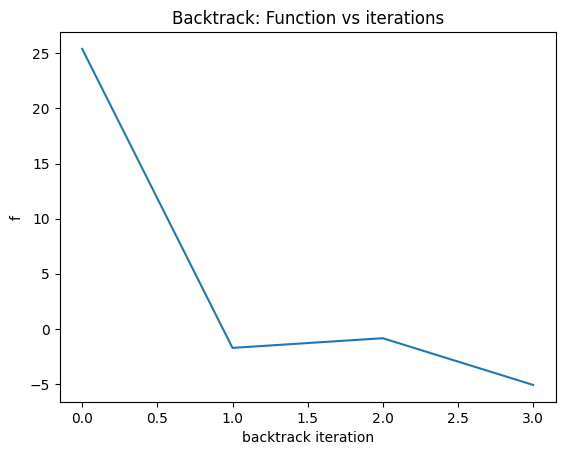

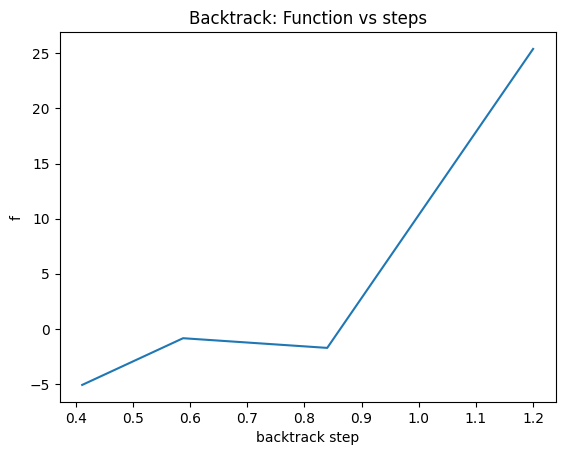

In [34]:
# run optimization on 4.8 with defaults
SUFF_DEC = 1e-4  # u
BKTRK = 0.7  # p
TOLERANCE = 1e-6  # t
GUESS_4_8 = np.array([-1.25, 1.25])
INITIAL_STEP = 1.2
# grad opt wont work because the direction function isnt implemented
# x, fx = grad_opt(fn_4_8, grad_4_8, dir_4_8, GUESS_4_8, TOLERANCE,
#                  INITAL_STEP, SUFF_DEC, BKTRK)
steps, fx = bktrk_lin_search(fn_4_8, grad_4_8, dir_4_8(
    GUESS_4_8), GUESS_4_8, INITIAL_STEP, SUFF_DEC, BKTRK)

print(
    f"final guess: {GUESS_4_8 + steps[-1]}, grad: {grad_4_8(GUESS_4_8 + steps[-1])}, dir grad: {np.dot(grad_4_8(GUESS_4_8 + steps[-1]), dir_4_8(GUESS_4_8))}")


# plot backtrack vs iterations
plt.plot(fx)
plt.xlabel("backtrack iteration")
plt.ylabel("f")
plt.title(f"Backtrack: Function vs iterations")
plt.show()


# plot backtrack vs step
plt.plot(steps, fx)
plt.xlabel("backtrack step")
plt.ylabel("f")
plt.title(f"Backtrack: Function vs steps")
plt.show()

In [5]:
# interpolation
def quad_interp_min(x1, x2, fx1, fx2, d_fx1):
    top = (2*x1*(fx2-fx1)+d_fx1*(x1**2 - x2**2))
    bottom = 2*((fx2-fx1)+d_fx1*(x1-x2))
    ans = top/bottom
    # see if ans is in between x1 and x2
    if np.linalg.norm(ans) < min(np.linalg.norm(x1), np.linalg.norm(x2)) or np.linalg.norm(ans) > max(np.linalg.norm(x1), np.linalg.norm(x2)):
        print(f"interpolation is out of range: {ans}")
        return (x2+x1)/2
    else:
        return ans

# pinpointing


def pinpoint(func, func_grad, dir, a_low, a_high, phi_0, phi_low, phi_high, phi_0_grad, phi_low_grad, phi_high_grad, suff_dec, suff_cur):
    k = 0
    while True:
        # a_p = interpolation_min(func, func_grad, a_low, a_high)
        a_p = quad_interp_min(a_low, a_high, func(
            a_low), func(a_high), func_grad(a_low))
        print(
            f"after interpolation: a_low: {a_low}, a_high: {a_high}, a_p: {a_p}")
        phi_p = func(a_p)
        phi_p_grad = func_grad(a_p)
        print(f"k: {k}, a_low: {a_low}, a_high: {a_high}, phi_0: {phi_0}, phi_low: {phi_low}, phi_high: {phi_high}, phi_0_grad: {phi_0_grad}, phi_low_grad: {phi_low_grad}, phi_high_grad: {phi_high_grad}, suff_dec: {suff_dec}, suff_cur: {suff_cur}")
        if phi_p > phi_0 + suff_dec*np.dot(a_p*phi_0_grad, dir) or phi_p > phi_low:
            a_high = a_p
            phi_high = phi_p
            # phi_high_grad = phi_p_grad
        else:
            if abs(np.dot(phi_p_grad, dir)) <= -suff_cur*np.dot(phi_0_grad, dir):
                a = a_p
                return a_p
            elif np.dot(phi_p_grad * (a_high - a_low), dir) >= 0:
                a_high = a_low
            a_low = a_p
        k = k+1


# bracketing
# suff_dec = u1
# suff_cur = u2
# step_inc = 𝜎 or sigma
# def bracket(func, func_grad, dir: npt.ArrayLike, guess: npt.ArrayLike, initial_step: float, suff_dec: float, suff_cur: float, step_inc: float):
#     step = initial_step
#     brkt_start = guess  # a1
#     brkt_end = guess + initial_step  # a2
#     func_0 = func(guess)  # phi 0
#     func_grad_0 = func_grad(guess)  # phi 0 prime
#     func_start = func_0  # phi 1
#     func_start_grad = func_grad_0  # phi 1 prime
#     # func_end = guess_diff # phi 2
#     first = True
#     while (True):
#         print(f"step: {step}, brkt_start: {brkt_start}, brkt_end: {brkt_end}")
#         func_end = func(brkt_end)  # phi 2
#         # check if sufficient decrease conditions already met or the end is higher than start
#         if (func_end > (func_0 + suff_dec * step * np.dot(dir, func_start_grad))) or (not first and func_end > func_start):
#             step = pinpoint(func, func_grad, dir, brkt_start,
#                             brkt_end, func_0, func_end, func(brkt_start), func_grad_0, func_grad(brkt_start), func_grad(brkt_end), suff_dec, suff_cur)
#             return step
#         func_end_grad = func_grad(brkt_end)  # phi 2 prime
#         # check if sufficient curvature conditions met
#         if abs(func_end_grad) <= -suff_cur*func_grad_0:
#             step = brkt_end
#             return step
#         # check if end gradient is positive, suggesting the min is within the bracket
#         elif func_end_grad >= 0:
#             # step = pinpoint(...)
#             step = pinpoint(func, func_grad, dir, brkt_end,
#                             brkt_start, func_0, func(brkt_start), func_end, func_grad_0, func_grad(brkt_end), func_grad(brkt_start), suff_dec, suff_cur)
#             return step
#         else:
#             brkt_start = brkt_end
#             brkt_end = brkt_start*step_inc
#         first = False

# phi(a) f(start + a*dir)
# d_phi(a) = np.dot(df(start + a*dir), dir)
# d_phi(0) = np.dot(df(start), dir)

def bracket(f, df):

    pass

2.3.a) Graphs for example 4.9


TypeError: bracket() takes 2 positional arguments but 8 were given

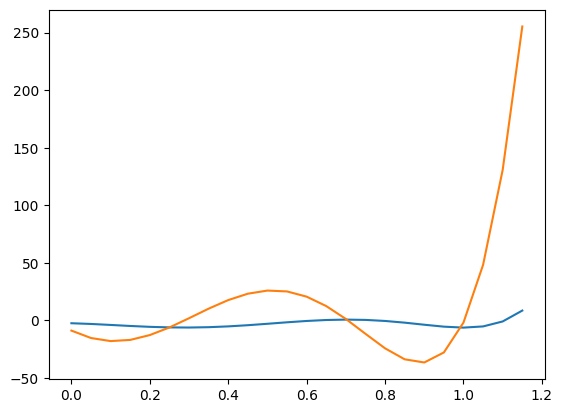

In [6]:
GUESS_4_8 = np.array([-1.25, 1.25])
steps = np.arange(0, 1.2, 0.05)
fx = [fn_4_8(GUESS_4_8 + (step * dir_4_8(GUESS_4_8)))
      for step in steps]
plt.plot(steps, fx)
fx = [np.dot(grad_4_8(GUESS_4_8 + (step * dir_4_8(GUESS_4_8))), dir_4_8(GUESS_4_8))
      for step in steps]
plt.plot(steps, fx)

# run bracketing on 4.9 with defaults
SUFF_DEC = 1e-4  # u1
SUFF_CUR = 0.9  # u2
STEP_INCR = 2
TOLERANCE = 1e-6  # t
INITAL_STEP = 1.2
x, fx = bracket(fn_4_8, grad_4_8, dir_4_8(GUESS_4_8), GUESS_4_8,
                INITAL_STEP, SUFF_DEC, SUFF_CUR, STEP_INCR)
print(x, fx)
# print(quad_interp_min(np.array([2, 2]), np.array(
#     [1, 1]), 10, 1, np.array([-1, -1])))